## Problem 2: Create buffers around shopping centers (7 points)

Let’s continue with our case study and calculate a 1.5 km buffer around the geocoded points. 

### a) Load the shopping centre data set

First, load the shopping centre *point* data set you created in *problem 1* into a `GeoDataFrame` called `shopping_centres`.

In [1]:
# ADD YOUR OWN CODE HERE

import pandas as pd
import geopandas as gpd

import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

shopping_centres = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg")

In [2]:
type(shopping_centres)

geopandas.geodataframe.GeoDataFrame

In [3]:
shopping_centres

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland",POINT (25504598.602 6677662.109)
1,"Jungle Juice Bar, 14-20, Mannerheimintie, Kesk...",2,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland",POINT (25496547.460 6672895.008)
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (25485470.435 6672070.967)
3,"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (25489491.076 6678322.265)
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",5,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (25497943.932 6686656.982)
5,"Silta, 5, Hermannin rantatie, Suvilahti, Kalas...",6,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (25498837.156 6674909.983)
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",7,Tripla,"Mall of Tripla, Fredikanterassi 1, 00520 Helsi...",POINT (25496145.658 6676164.227)


<AxesSubplot: >

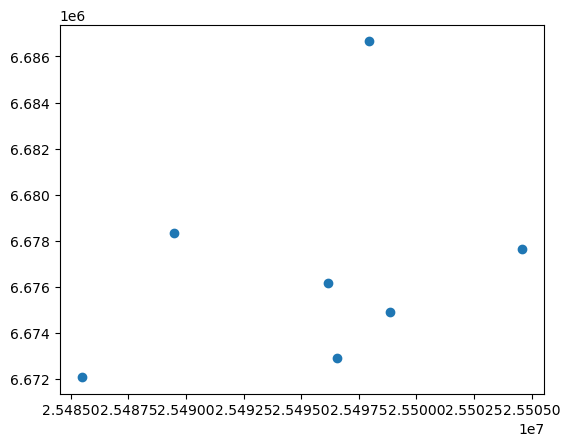

In [4]:
shopping_centres.plot()


---

### b) Create a *buffer* around the points

Calculate a 1.5 km buffer for each geocoded point. Overwrite the `geometry` column with the new buffer geometry.

Use the [`geopandas.GeoDataFrame.buffer()` method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), that uses shapely’s [`buffer()`](http://toblerity.org/shapely/manual.html#object.buffer) in the background. You only need to care about the `distance` parameter, don’t worry about the possible other arguments.

In [5]:
# ADD YOUR OWN CODE HERE
shopping_centres["geometry"] = shopping_centres.buffer(distance=1500)
shopping_centres

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"Jungle Juice Bar, 14-20, Mannerheimintie, Kesk...",2,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498047.460 6672895.008, 25498040.2..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",5,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Silta, 5, Hermannin rantatie, Suvilahti, Kalas...",6,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",7,Tripla,"Mall of Tripla, Fredikanterassi 1, 00520 Helsi...","POLYGON ((25497645.658 6676164.227, 25497638.4..."


In [6]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert shopping_centres.geometry.geom_type.unique() == ["Polygon"]


---

### d) Save buffer geometry layer

Save the data frame containing the buffer geometries into a new layer `buffers` inside the same *GeoPackage* `shopping_centres.gpkg`:

In [7]:
# ADD YOUR OWN CODE HERE

shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers")